In [1]:
from luwiji.logistic_regression import illustration, demo

# Precision-Recall Tradeoff & Sensitivity-Specificity Tradeoff

In [2]:
demo.ss_pr_tradeoff()

interactive(children=(SelectionSlider(description='pos sample', index=10, options=(0.01, 0.05, 0.1, 0.15, 0.2,…

`Threshold rendah` -> `Prediksi positif semua` -> `FN=0` -> `High recall / sensitivity`

# Receiver Operating Characteristic (ROC)

Plot Sensitivity vs (1-Specificity) atau TPR vs FPR

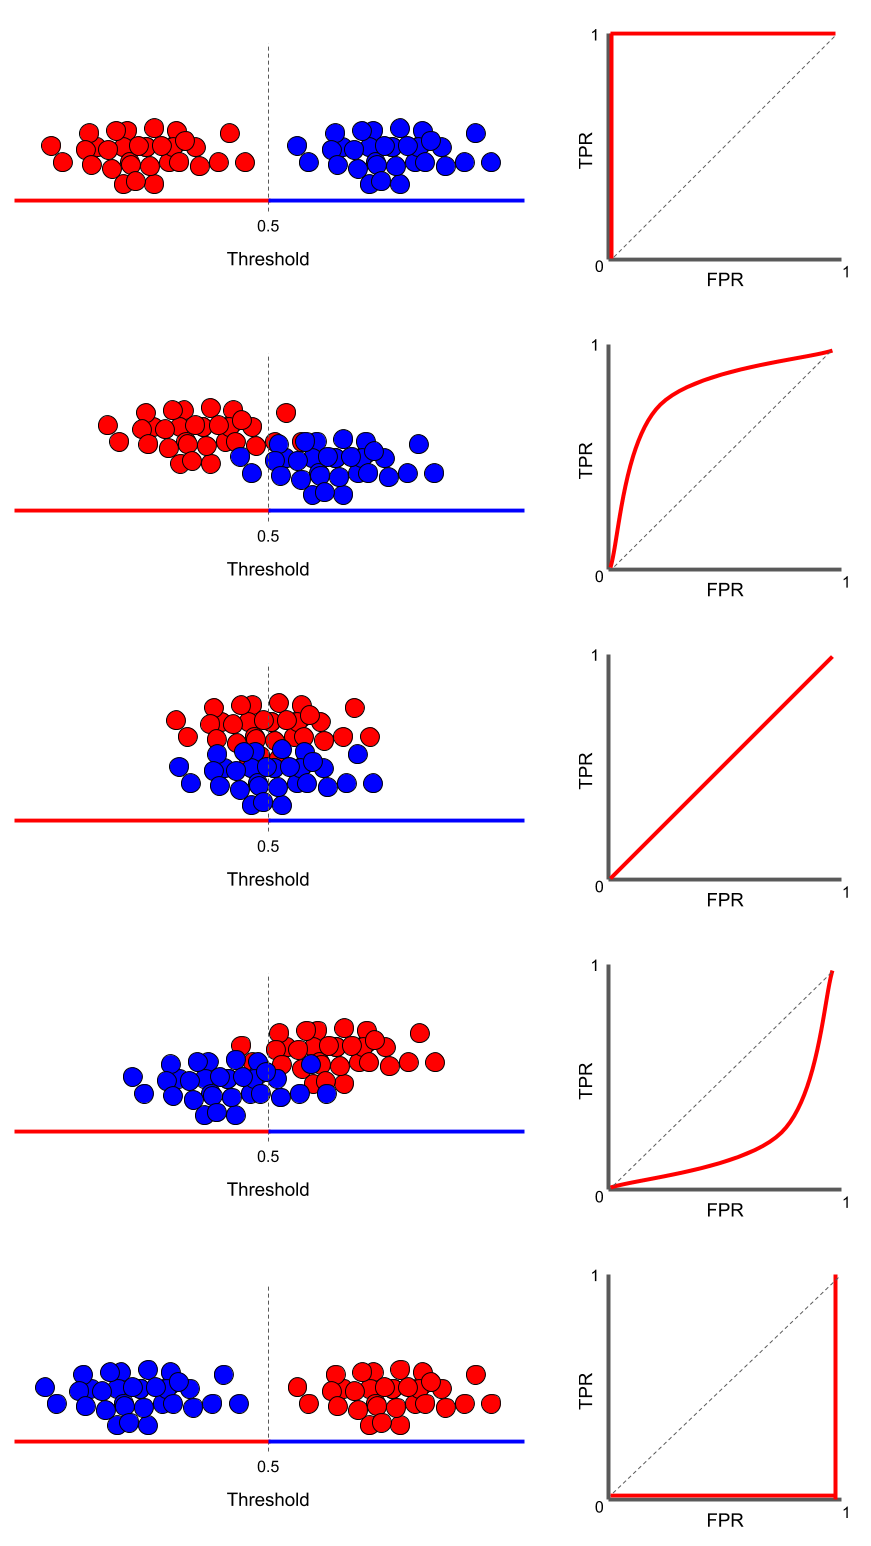

In [3]:
illustration.roc

# Precision-Recall curve

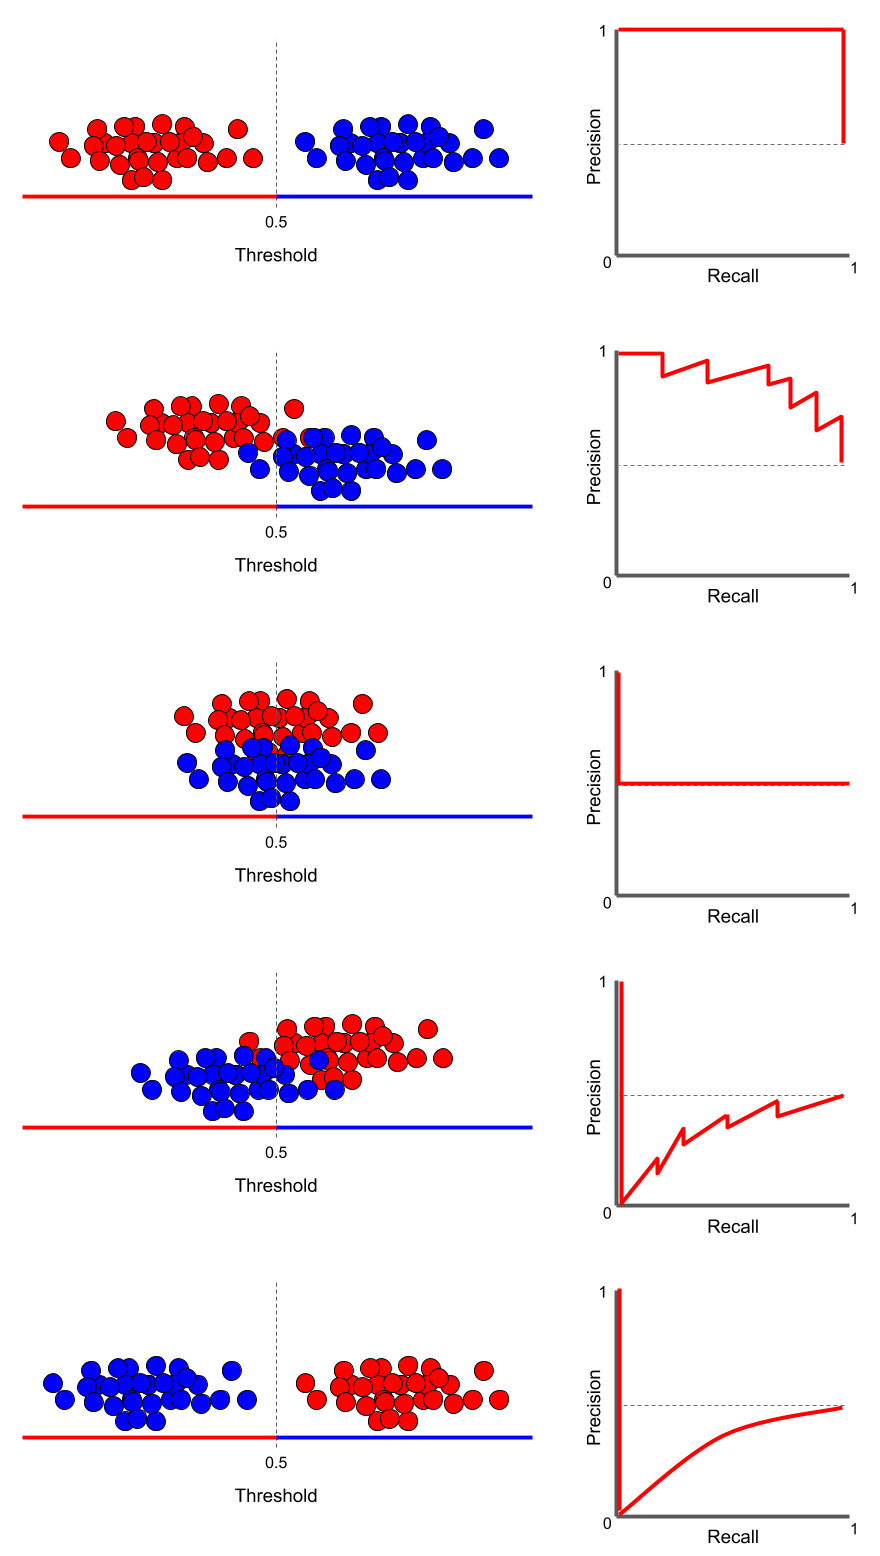

In [4]:
illustration.precision_recall

# Area Under the Curve (AUC)

Untuk mempermudah analisis, kurva tersebut direpresentasikan dengan luas dibawah kurva tersebut karena luasnya berkisar antara 0 sampai 1 seperti score pada umumnya.

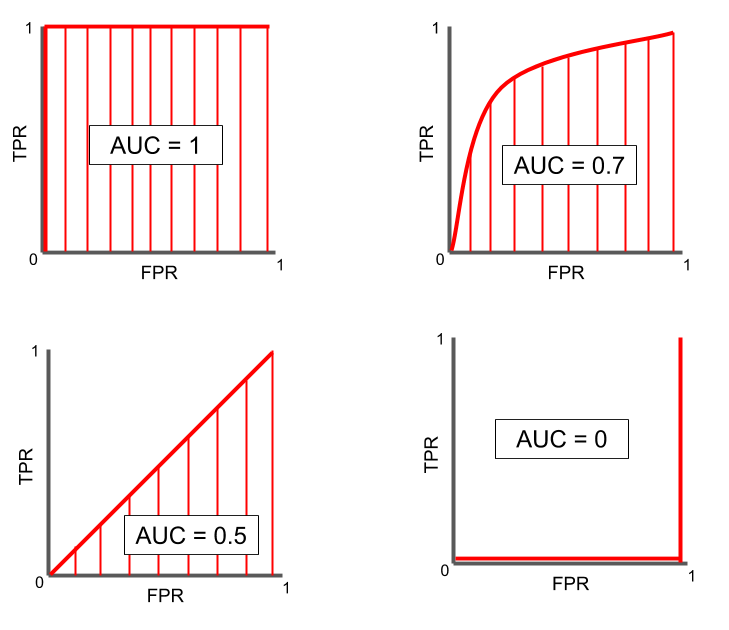

In [5]:
illustration.roc_auc

PR_AUC juga sama seperti ROC_AUC, tetapi jarang dipakai. Umumnya precision-recall curve dirangkum menggunakan Average Precision (AP)

# ROC dan PR dengan jcopml

In [6]:
from luwiji.evaluation import demo
from jcopml.plot import plot_roc_curve, plot_pr_curve

In [7]:
X_train, y_train, X_test, y_test, model = demo.get_binary_class_data()

### ROC Curve

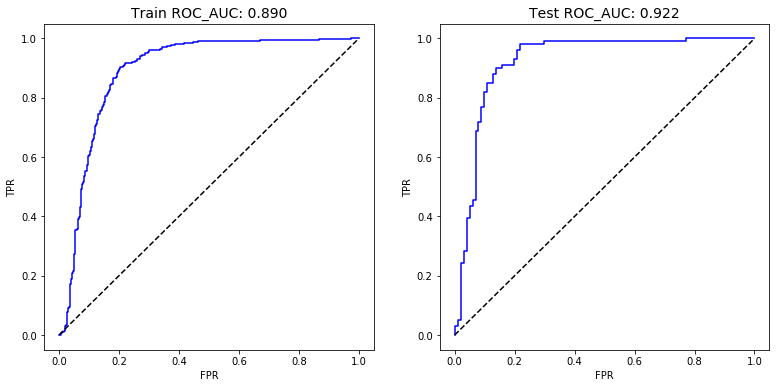

In [8]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

### PR curve

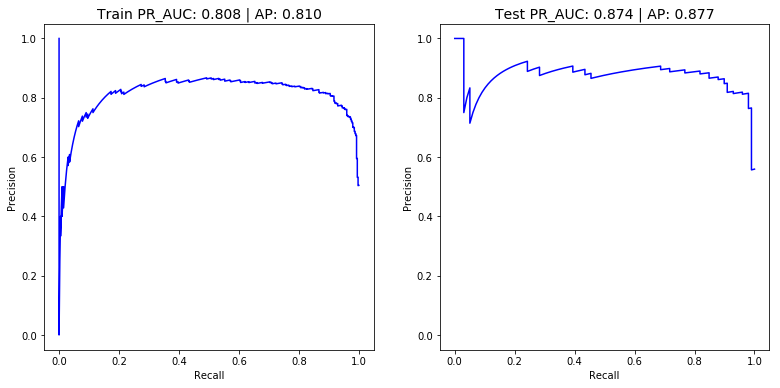

In [9]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Efek Imbalance Dataset terhadap ROC dan PR (Optional)

In [10]:
from luwiji.logistic_regression import demo

In [11]:
demo.roc_pr_imbalance()

interactive(children=(SelectionSlider(description='pos sample', index=5, options=(0.01, 0.05, 0.1, 0.25, 0.4, …

# Points to note

- Linearly separable
    - mudah dimodelkan
    - ROC_AUC maupun PR_AUC sama-sama menghasilkan score yang tinggi

- Lack data
    - score cenderung overestimate
    - secara umum (termasuk metric lainnya), kalau data sedikit, maka score tidak reliable
    - ilustrasi: bayangkan kalau cuman 1 data, otomatis score diantara 0 atau 100%, sangat tidak stabil
    
- balance data (positive sample 20%-80%)
    - ROC_AUC maupun PR_AUC bisa digunakan

- Lack data + imbalance = pseudo linearly separable
    - tambahkan class yang datanya terlalu sedikit

- Imbalance (positive sample > 95%)
    - Jangan pakai PR_AUC karena baselinenya sudah terlalu tinggi
    - ROC_AUC akan overestimate (lack data akan membuat overestimatenya semakin parah)
    - Jadi walaupun imbalance 95%, tapi datanya banyak, efek overestimatenya tidak terlalu parah
    - rekomendasi: redefine label supaya negative sample yang lebih banyak

- Imbalance (positive sample < 5%)
    - Pakailah PR_AUC karena ROC_AUC cenderung overestimate